<h1 style="text-align: center; color: aqua; font-family: cursive;font-weight:800">
  importing libraries
</h1>
<p style="text-align: center; color: brown; font-family: sans-serif;font-weight:800">
This is full exploratory-data-analysis and model building pipeline of the Logistic Regression (NLP) model we built    
</p>

In [72]:
import os
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams
import string
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from pprint import pprint
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from nltk.corpus import reuters
from operator import itemgetter
import pandas as pd
import numpy as np

<h1 style="text-align: center; color: aqua; font-family: cursive;font-weight:800">
  lets start to explore our data
</h1>


In [73]:
stopwords.words('english')
x= word_tokenize('This is just a test')

print('You are all set',x)

You are all set ['This', 'is', 'just', 'a', 'test']


In [74]:
data = pd.read_csv('../input/emotions-dataset-for-nlp/train.txt',sep=';',names=['text','mood'])
data.head()
df = data.copy()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: mood, dtype: int64


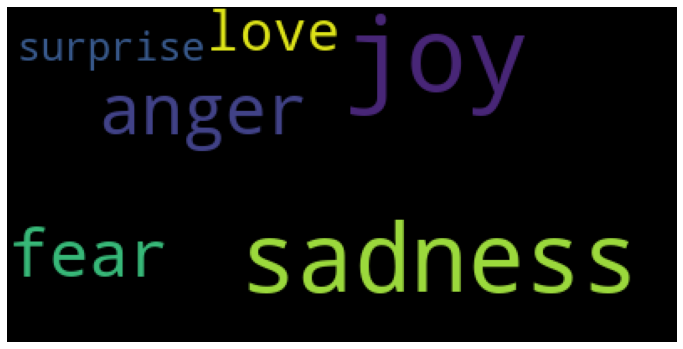

In [75]:
print(df['mood'].value_counts())
# looks like everything is in enough quantity in the data to 
# make a good multi-label classification
# lets see the wordcloud too to get a clear picture of the same
def listToString(s):  
    
    # initialize an empty string 
    str1 = ''' '''  
    
    # traverse in the string   
    for ele in s: 
#         for k in ele:
        str1 += ele+' '
    
    # return string   
    return str1  
        
cloud = WordCloud(max_words=100)
cloud.generate_from_text(listToString(df['mood'].values))

plt.figure(figsize=(12,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

<h3 style="text-align: center; color: aqua; font-family: cursive;font-weight:800">Tokenisation</h3>
<p style="text-align: center; color: brown; font-family: serif;font-weight:800">Tokenisation is the process of splitting a raw string into a list of tokens</p>

<li>What is a token? We're interested in meaningful units of text:</li>

<li>Words,Phrases,Punctuation,Numbers,Dates,Currencies,Hashtags,...
</li>

In [76]:
df['tokenized'] = df['text'].apply(word_tokenize)
df.head()

,text,mood,tokenized
0,i didnt feel humiliated,sadness,"[i, didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,sadness,"[i, can, go, from, feeling, so, hopeless, to, ..."
2,im grabbing a minute to post i feel greedy wrong,anger,"[im, grabbing, a, minute, to, post, i, feel, g..."
3,i am ever feeling nostalgic about the fireplac...,love,"[i, am, ever, feeling, nostalgic, about, the, ..."
4,i am feeling grouchy,anger,"[i, am, feeling, grouchy]"


In [77]:
for i,ra in zip(df['tokenized'],range(0,5)):
    print(i)

['i', 'didnt', 'feel', 'humiliated']
['i', 'can', 'go', 'from', 'feeling', 'so', 'hopeless', 'to', 'so', 'damned', 'hopeful', 'just', 'from', 'being', 'around', 'someone', 'who', 'cares', 'and', 'is', 'awake']
['im', 'grabbing', 'a', 'minute', 'to', 'post', 'i', 'feel', 'greedy', 'wrong']
['i', 'am', 'ever', 'feeling', 'nostalgic', 'about', 'the', 'fireplace', 'i', 'will', 'know', 'that', 'it', 'is', 'still', 'on', 'the', 'property']
['i', 'am', 'feeling', 'grouchy']



<h3 style="text-align: center; color: aqua; font-family: cursive;font-weight:800">Stop-words</h3>
<p style="text-align: center; color: brown; font-family: serif;font-weight:800">We notice that some of the most common words above are not very interesting . These words are called stop-words, and they don't provide any particular meaning in isolation (articles, conjunctions, pronouns, etc.)</p>

<p style="text-align: left; color: black; font-family: cursive;font-weight:500">
Notice:
there is no "universal" list of stop-words
removing stop-words can be useful or damaging depending on the application  e.g. if you remove stop-words, what do you do with "The Who", "to be or not to be" and similar phrases?</p>

In [78]:
stop_list = stopwords.words('english') + list(string.punctuation)
# stopped = np.array([ df['tokenized'][i].apply(stopwords) for i in len(df['tokenized']) ])
# # this process wont come in handy since its a cumbersome to write so much
# # instead we use lambda functions for our rescue 
# no_stop = []
# for i in df['tokenized']:
#     no_stop.append(df['tokenized'].map(lambda i:i if i not in stop_list))

In [79]:
no_stops = [] 
for i in df['tokenized']:
#     we declare a str word
# then after checking whether the word is a stopword or not
# we add the word to the string 
# you can try to play with this part of the NB after forking it
    word = ''
    for k in i:
        if k not in stop_list:
             word += k+' '
    split = word.split(' ')
#     print(split)
    # it was appending something like this 
    # so i changed the index of whats getting appended
    #     ['didnt', 'feel', 'humiliated', '']

    no_stops.append(split[:-1])

In [80]:
# just in case if you wanna see how it worked uncomment this
# no_stops

In [81]:
df['nostop'] = no_stops

In [82]:
df.head(20)

,text,mood,tokenized,nostop
0,i didnt feel humiliated,sadness,"[i, didnt, feel, humiliated]","[didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,sadness,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,anger,"[im, grabbing, a, minute, to, post, i, feel, g...","[im, grabbing, minute, post, feel, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,anger,"[i, am, feeling, grouchy]","[feeling, grouchy]"
5,ive been feeling a little burdened lately wasn...,sadness,"[ive, been, feeling, a, little, burdened, late...","[ive, feeling, little, burdened, lately, wasnt..."
6,ive been taking or milligrams or times recomme...,surprise,"[ive, been, taking, or, milligrams, or, times,...","[ive, taking, milligrams, times, recommended, ..."
7,i feel as confused about life as a teenager or...,fear,"[i, feel, as, confused, about, life, as, a, te...","[feel, confused, life, teenager, jaded, year, ..."
8,i have been with petronas for years i feel tha...,joy,"[i, have, been, with, petronas, for, years, i,...","[petronas, years, feel, petronas, performed, w..."
9,i feel romantic too,love,"[i, feel, romantic, too]","[feel, romantic]"


<h3 style="text-align: center; color: aqua; font-family: cursive;font-weight:800">Text Normalisation</h3>
<p style="text-align: center; color: brown; font-family: cursive;font-weight:800">
Replacing tokens with a canonical form, so we can group together different spelling/variations of the same word</p>

<p style="text-align: left; color: black; font-family: cursive;font-weight:500">
Examples:</p>

* lowercasing

* stemming

* American-to-British mapping

* synonym mapping

<p style="text-align: left; color: black; font-family: cursive;font-weight:500">
<i>Stemming</i> is the process of reducing a word to its base/root form, called stem</p>

In [83]:
%time
stemmer = PorterStemmer()
stems = []
for i in df['nostop']:
    local_Stems = []
    for k in i:
        klower = k.lower()
        local_Stems.append(stemmer.stem(klower))
        
    stems.append(local_Stems)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 22.6 µs


In [84]:
# stems
# we have got stems now 
# we make a seperate col for the same 
df['stem'] = stems

<h3 style="text-align: center; color: aqua; font-family: cursive;font-weight:800">Gyan(knowledge) Time !!</h3>

stemming reduces words to root base 

sometimes to words which doesnt even mean anything

hence we use 

Lemmatisation Technique to reduce/normalise the data 

In [85]:
%time
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
lemma_list = []
for i in no_stops:
    # we use local lists to store the lemmatized 
    # words collected at one place and then get appended 
    # onto global list
    # which will be helpful in mapping 
    # to the newer columns
    local_lemmas = []
    for k in i:
        local_lemmas.append(lemmatizer.lemmatize(k))
        
    lemma_list.append(local_lemmas)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10.7 µs


In [86]:
df['lemmatized'] = lemma_list

In [87]:
df[['stem','lemmatized']].head(20)

,stem,lemmatized
0,"[didnt, feel, humili]","[didnt, feel, humiliated]"
1,"[go, feel, hopeless, damn, hope, around, someo...","[go, feeling, hopeless, damned, hopeful, aroun..."
2,"[im, grab, minut, post, feel, greedi, wrong]","[im, grabbing, minute, post, feel, greedy, wrong]"
3,"[ever, feel, nostalg, fireplac, know, still, p...","[ever, feeling, nostalgic, fireplace, know, st..."
4,"[feel, grouchi]","[feeling, grouchy]"
5,"[ive, feel, littl, burden, late, wasnt, sure]","[ive, feeling, little, burdened, lately, wasnt..."
6,"[ive, take, milligram, time, recommend, amount...","[ive, taking, milligram, time, recommended, am..."
7,"[feel, confus, life, teenag, jade, year, old, ...","[feel, confused, life, teenager, jaded, year, ..."
8,"[petrona, year, feel, petrona, perform, well, ...","[petronas, year, feel, petronas, performed, we..."
9,"[feel, romant]","[feel, romantic]"


well as you may see there is huge difference in stemming n lemmatization in this case

but surely lemmatization is better than stemming although it requires high computation time

we wont use stemming in our model , though ,
its always better to understand the better alternatives available with us


In [88]:
# we transform the stem column from a list to string 
def lst_2_str(lst):
    return 
lst_2_str(['hey','bro'])

In [89]:
df['lemmatized'] = df['lemmatized'].map(lambda x: ' '.join(x))

In [90]:
df.head()

,text,mood,tokenized,nostop,stem,lemmatized
0,i didnt feel humiliated,sadness,"[i, didnt, feel, humiliated]","[didnt, feel, humiliated]","[didnt, feel, humili]",didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun...","[go, feel, hopeless, damn, hope, around, someo...",go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,anger,"[im, grabbing, a, minute, to, post, i, feel, g...","[im, grabbing, minute, post, feel, greedy, wrong]","[im, grab, minut, post, feel, greedi, wrong]",im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st...","[ever, feel, nostalg, fireplac, know, still, p...",ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,anger,"[i, am, feeling, grouchy]","[feeling, grouchy]","[feel, grouchi]",feeling grouchy


In [91]:
# to handle this error , we convert each  string to list 
# finally we will get list of lists
df['mood'] = df['mood'].map(lambda x : [f'{x}'])

<h1 style="text-align: center; color: brown; font-family:sans-serif;font-weight:200 ; height:70"> Training With CV</h1>


we now use grid_search_cv to see whether there is change in accuracy and other metrics or not 

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

train = df.loc[:,'mood':'lemmatized']
x,y = train.loc[:,'lemmatized'],train.loc[:,'mood']

lr_count = Pipeline([('count',CountVectorizer()),('lr',LogisticRegression())])

# scorer = make_scorer(f1_score,)

lr_param_grid = {
    'lr__penalty':[10,8,12,15],
    'lr__C':np.arange(1,10,dtype='float'),
    'lr__n_jobs':[-1],
    'lr__penalty':['l1','l2']
}

grid_lr = GridSearchCV(lr_count,lr_param_grid,scoring='accuracy',cv=6,n_jobs=-1)
grid_lr.fit(x,data['mood'].values)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('count', CountVectorizer()),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': array([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
                         'lr__n_jobs': [-1], 'lr__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [93]:
grid_lr.best_score_

0.8880622855376387

In [94]:
grid_lr.best_params_

{'lr__C': 2.0, 'lr__n_jobs': -1, 'lr__penalty': 'l2'}

<h1 style="text-align: center; color: aqua; font-family: cursive;font-weight:800 ; height:70"> Testing Time</h1>


In [95]:
test_data = pd.read_csv('../input/emotions-dataset-for-nlp/test.txt',sep=';',names=['text','mood'])
test_df = test_data.copy()

In [96]:
# full transformation pipeline
def transform_testing(test_df):
    test_df['tokenized'] = test_df['text'].apply(word_tokenize)

    no_stops = [] 
    for i in test_df['tokenized']:
        word = ''
        for k in i:
            if k not in stop_list:
                 word += k+' '
        split = word.split(' ')
        no_stops.append(split[:-1])
    test_df['nostop'] = no_stops
    lemmatizer = WordNetLemmatizer()
    lemma_list = []
    for i in no_stops:
        local_lemmas = []
        for k in i:
            local_lemmas.append(lemmatizer.lemmatize(k))

        lemma_list.append(local_lemmas)
        
    test_df['lemmatized'] = lemma_list
    test_df['lemmatized'] = test_df['lemmatized'].map(lambda x: ' '.join(x))
    return test_df

In [97]:
test_df = transform_testing(test_df)
test_x,test_y = test_df.loc[:,'lemmatized'],test_df.loc[:,'mood']
test_df.tail()

,text,mood,tokenized,nostop,lemmatized
1995,i just keep feeling like someone is being unki...,anger,"[i, just, keep, feeling, like, someone, is, be...","[keep, feeling, like, someone, unkind, wrong, ...",keep feeling like someone unkind wrong think g...
1996,im feeling a little cranky negative after this...,anger,"[im, feeling, a, little, cranky, negative, aft...","[im, feeling, little, cranky, negative, doctor...",im feeling little cranky negative doctor appoi...
1997,i feel that i am useful to my people and that ...,joy,"[i, feel, that, i, am, useful, to, my, people,...","[feel, useful, people, gives, great, feeling, ...",feel useful people give great feeling achievement
1998,im feeling more comfortable with derby i feel ...,joy,"[im, feeling, more, comfortable, with, derby, ...","[im, feeling, comfortable, derby, feel, though...",im feeling comfortable derby feel though start...
1999,i feel all weird when i have to meet w people ...,fear,"[i, feel, all, weird, when, i, have, to, meet,...","[feel, weird, meet, w, people, text, like, don...",feel weird meet w people text like dont talk f...


In [100]:
pred_LR = grid_lr.predict(test_x)

<AxesSubplot:>

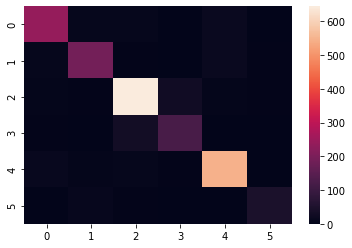

In [98]:
from sklearn.metrics import confusion_matrix 
from seaborn import heatmap
heatmap(confusion_matrix(test_y,pred_LR))
#  we can see the accuracy as the wrong predictions are very less 

In [99]:
from sklearn.metrics import accuracy_score,f1_score,precision_recall_curve,precision_score,make_scorer
print(accuracy_score(test_y,pred_LR))
print(f1_score(test_y,pred_LR,average='weighted'))
print(precision_score(test_y,pred_LR,average='weighted'))

0.894
0.8934804655137271
0.8931504473253485


In [101]:
f1_score(test_y,pred_LR,average='weighted')

0.8934804655137271

In [102]:
precision_score(test_y,pred_LR,average='weighted')

0.8931504473253485

In [103]:
import joblib
file = open('sentiment_model.pkl','wb')
joblib.dump(grid_lr,file)
file.close()